In [29]:
import numpy as np
import matplotlib.pyplot as plt


# Drift coefficient
mu = 0.1

# Volatility parameter (e.g. 0.25 -> 25%)
sigma = 0.25

# Initial (stock) price
S0 = 100

# Time periods (e.g. years)
T = 4

num_steps = 20
num_sims = 100

In [30]:
# Compute size of each time step as an interval over the whole period
dt = T/num_steps

# Simulate GBM for every timestep. Shape = (num_steps-1, num_sims) to allow room for ths 1s below.
St = np.exp((mu - 0.5*sigma**2) * dt + sigma * np.random.normal(0, np.sqrt(dt), size=(num_sims, num_steps-1)).T)

# Prepend array of 1s: S(0) = 0 --> ln(S(0)) = 1. Shape = (num_steps, num_sims).
St = np.vstack([np.ones(num_sims), St])

# Multiply by initial value. Accumulate (drift + diffusion) per timestep across all timesteps for the full simulation path.
St = S0 * St.cumprod(axis=0)

# Array of all the timesteps
t = np.linspace(0, T, num_steps)

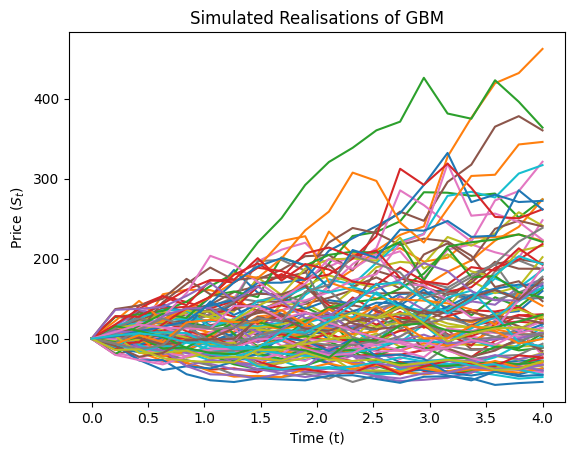

In [ ]:
plt.plot(t, St)
plt.xlabel("Time (t)")
plt.ylabel("Price $(S_t)$")
plt.title("Simulated Realisations of GBM")
plt.show()